# HW 9 Problem 1

For this homework, I have collected some audio  data using the [phyphox](https://phyphox.org) app  on iphone.   The app has a many experimental features but in this notebook, I will use the " Audio Scope " experiment . The audio scope uses only  the microphone to record audio data and that represent them on Amplitude vs time plot. The app has maximum limit of 500 ms of duration to record audio. 
## Audio data 
First, Using the app I let the app to take the data for around 500 ms. The data plot in the app looks like this :

![screenshot](ap.png)

From the data is saved in a ".csv" file which has only 2 column (amplitude and time).  he plot of the data in jupyter notebook using numpy and pandas is given below:

## Imports 

The necessary imports are given below:

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %load_ext pycodestyle_magic  # For linting codes
# %pycodestyle_on

In [8]:
df = pd.read_csv('Audio.csv',sep = ",")
df

,Time (ms),Recording (a.u.)
0,0.000000,0.000305
1,0.020834,0.001338
2,0.041668,0.002038
3,0.062502,0.002141
4,0.083336,0.001587
...,...,...
23995,499.914770,0.001636
23996,499.935604,0.002359
23997,499.956438,0.002697
23998,499.977272,0.002605


In [9]:
X = df['Time (ms)']
Y = df['Recording (a.u.)']

The plot of the data in my jupyter notebook : 

Text(0.5, 1.0, 'Audio data with phyphox')

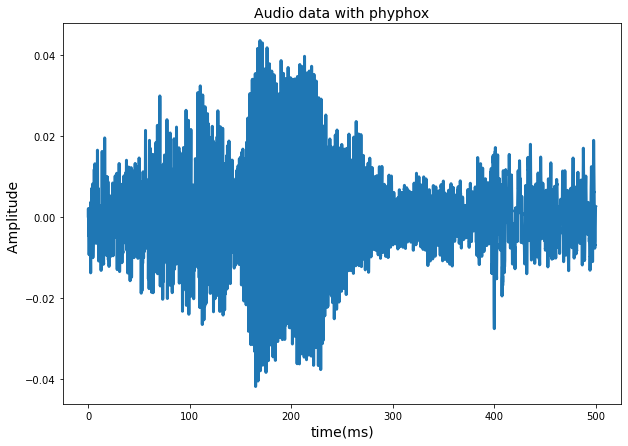

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(X,Y, lw=3)
ax.set_xlabel('time(ms)',fontsize=14)
ax.set_ylabel('Amplitude ',fontsize=14)
ax.set_title('Audio data with phyphox',fontsize=14)

So far, Its just the same as the picture above . Now I am going to do some analysis bases on what I have learned so far.

From the data I am going to take the fourier transform and sort out the peaks for frequencies. (same as I did in homeowrk 7) 

## Analysis
 First I am going to take the fourier transfer of the audio amplitudes using numpy fft.

In [24]:
from numpy import fft 
y = np.fft.fft(Y)
y_abs = abs(y)
print(len(y_abs),len(X))

24000 24000


Text(0.5, 1.0, 'FFT of Audio data ')

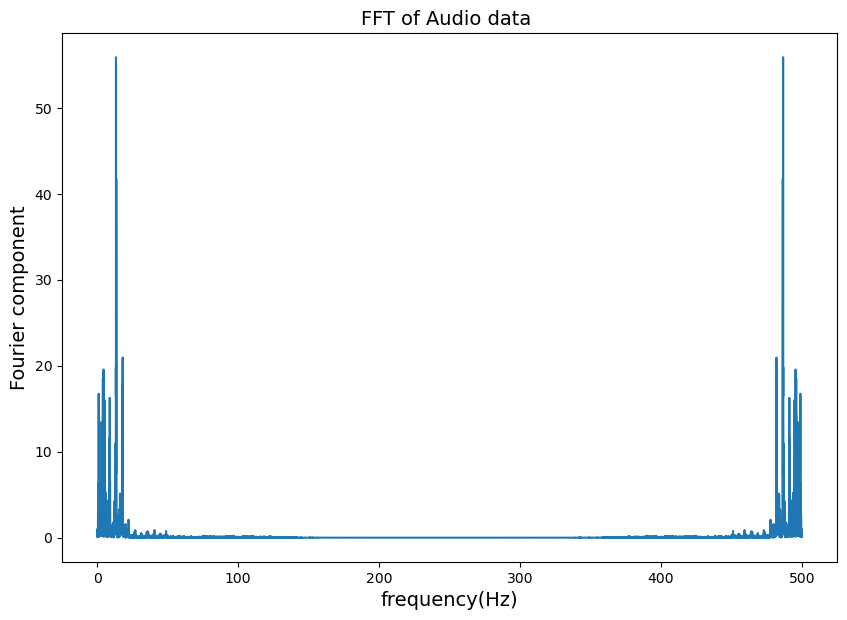

In [30]:
fig, ax = plt.subplots(figsize=(10,7))
plt.rcParams["figure.dpi"] = 100  # just to have a better view 
ax.plot(X, y_abs)
ax.set_xlabel('frequency(Hz)',fontsize=14)
ax.set_ylabel('Fourier component',fontsize=14)
ax.set_title('FFT of Audio data ',fontsize=14)

Here, my  understanding is  that  we got storng frequencies at the begining (between 0 to 20)  and at the end (between 480 to 500).  In between  we have very weak frequencies .

I will use the numpy fftfreq to retrieve the  frequencies from the data . The sample frequencies are plotted below:

Text(0.5, 1.0, 'FFT Sample Frequencies')

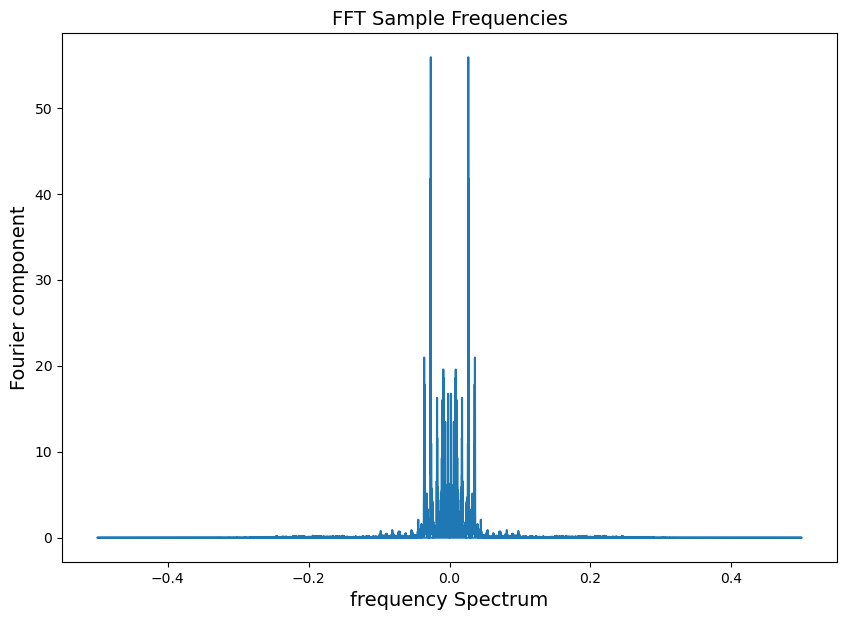

In [32]:
freqs = np.fft.fftfreq(len(y_abs))
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(freqs,y_abs)
ax.set_xlabel('frequency Spectrum',fontsize=14)
ax.set_ylabel('Fourier component',fontsize=14)
ax.set_title('FFT Sample Frequencies',fontsize=14)

If I want to have a look at the peaks only, I can just sor it out using scipy find peaks. 

In [36]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(y_abs, height=0)
freqs[peaks]

array([ 8.33333333e-05,  2.50000000e-04,  3.75000000e-04, ...,
       -3.75000000e-04, -2.50000000e-04, -8.33333333e-05])

## Convert the data analysis to python

I will create a file name audio_fft.py with the following codes (taken from above) 


import math \
import numpy as np \
import matplotlib.pyplot as plt \
from numpy import fft 

def audio_fft(X,Y):

    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(X,Y, lw=3)
    ax.set_xlabel('time(ms)',fontsize=14)
    ax.set_ylabel('Amplitude ',fontsize=14)
    ax.set_title('Audio data with phyphox',fontsize=14)
    plt.show()
    y = np.fft.fft(Y)
    y_abs = abs(y)
    fig, ax = plt.subplots(figsize=(10,7))
    plt.rcParams["figure.dpi"] = 100  # just to have a better view 
    ax.plot(X, y_abs)
    ax.set_xlabel('frequency',fontsize=14)
    ax.set_ylabel('Fourier component',fontsize=14)
    ax.set_title('FFT of Audio data ',fontsize=14)
    plt.show()
    freqs = np.fft.fftfreq(len(y_abs))
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(freqs,y_abs)
    ax.set_xlabel('frequency Spectrum',fontsize=14)
    ax.set_ylabel('Fourier component',fontsize=14)
    ax.set_title('FFt of Audio data',fontsize=14)
    plt.show()
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(y_abs, height=0)
    return freqs[peaks]

No we can call this python program  to produce all of the result above . But we will have to provide tha values for x and y , which we already have listed above. 

Checking the python file : Lets import  the audio.py 

In [34]:
import audio_fft

No I am going to call the function "audio_fft" with the values fo X and Y

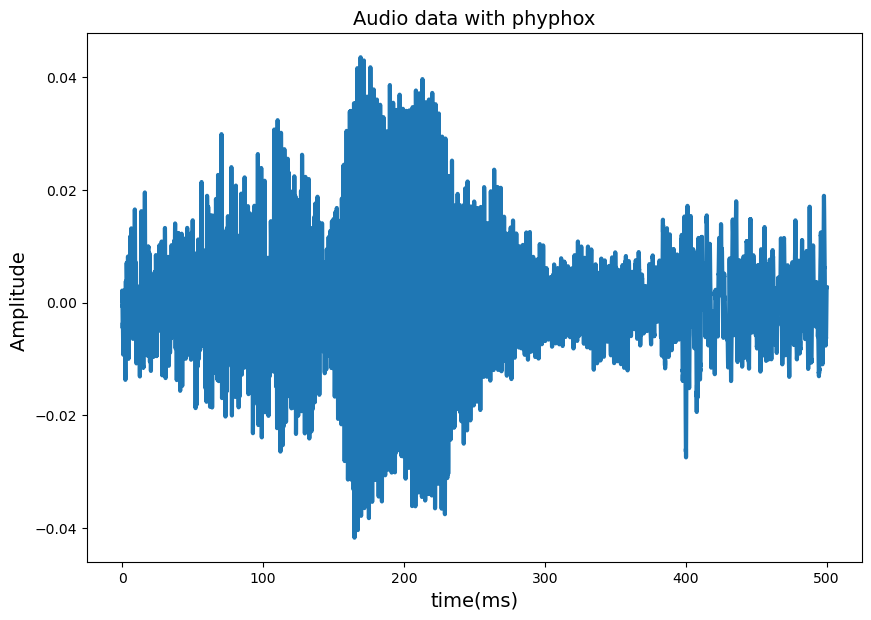

24000 24000


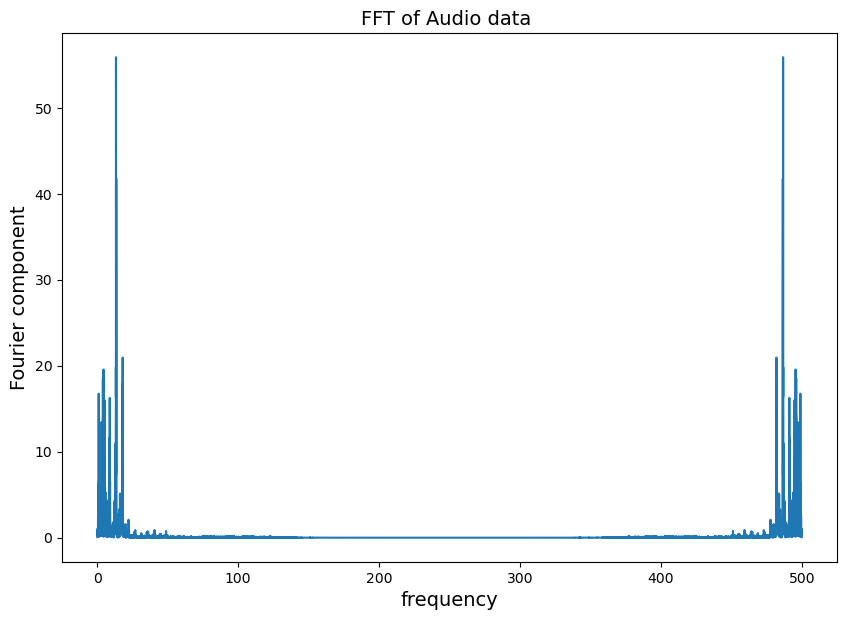

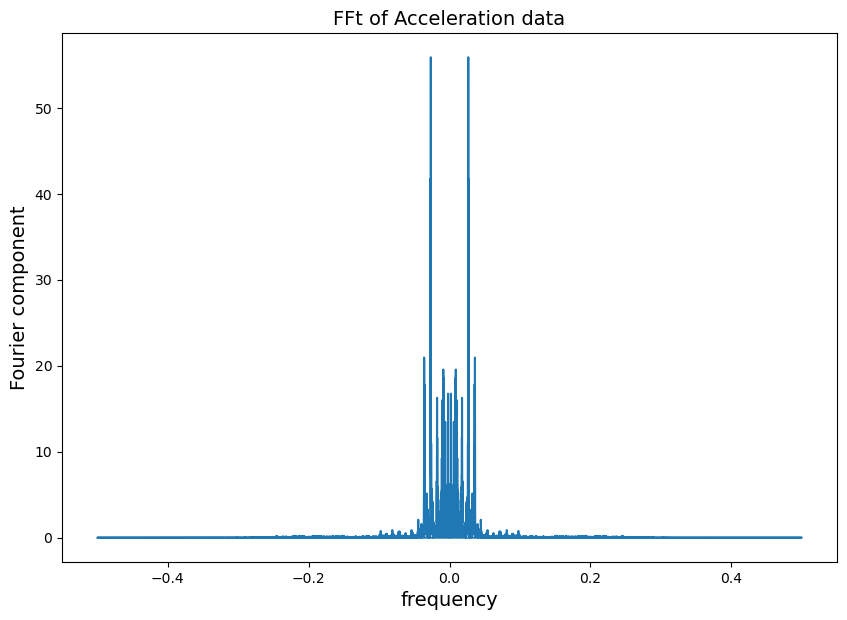

array([ 8.33333333e-05,  2.50000000e-04,  3.75000000e-04, ...,
       -3.75000000e-04, -2.50000000e-04, -8.33333333e-05])

In [35]:
audio_fft.audio_fft(X,Y)

I am not sure how to get rid of some of this low frequencies . It could have been nice if I could do so.